In [258]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import datetime

In [259]:
# List all CSV files in the folder
folder_path = 'zem_wk_data'  # update this to your folder
file_names = [f for f in os.listdir(folder_path) if f.endswith('.xlsx')]

df = pd.read_excel("zem_wk_data/" + file_names[0])

for i in range(1, len(file_names)):
    file = file_names[i]
    df_new_rows = pd.read_excel("zem_wk_data/" + file)
    df = pd.concat([df, df_new_rows])

In [ ]:
df = df[df["Site"] == "Test Site 1"]
sensor_names = df["Sensor Name"].unique()
df["sensor_1"] = [sensor_str[:6] for sensor_str in df["Sensor Name"]]
df["sensor_2"] = [sensor_str[9:] for sensor_str in df["Sensor Name"]]
df["date"] = [datetime.datetime.strptime(date, "%Y-%m-%d") for date in df["Date"]]
df["Usage"] = [float(num[:-4]) for num in df["Usage"]]
df = df.drop(columns=["Site", "Date"]).reset_index(drop=True)
df = df.rename(columns={"Usage": "usage_kWh"})
df["day_of_week_str"] = [date.strftime("%A") for date in df["date"]]
df["week_day"] = [0 if date in ["Sunday", "Saturday"] else 1 for date in df["date"]]
df["day_of_week_num"] = [date.weekday() for date in df["date"]] # Monday=0, Sunday=6

In [261]:
df[df["sensor_2"].isin(["DB04", "DB05"])]

,Sensor Name,usage_kWh,sensor_1,sensor_2,date,day_of_week_str,week_day,day_of_week_num
536,ZEM001 - DB04,7.8,ZEM001,DB04,2025-03-12,Wednesday,1,2
537,ZEM001 - DB04,18.0,ZEM001,DB04,2025-03-13,Thursday,1,3
538,ZEM001 - DB04,18.7,ZEM001,DB04,2025-03-14,Friday,1,4
539,ZEM001 - DB04,9.1,ZEM001,DB04,2025-03-15,Saturday,1,5
540,ZEM001 - DB04,8.9,ZEM001,DB04,2025-03-16,Sunday,1,6
...,...,...,...,...,...,...,...,...
1201,ZEM003 - DB05,0.3,ZEM003,DB05,2025-07-19,Saturday,1,5
1202,ZEM003 - DB05,0.3,ZEM003,DB05,2025-07-20,Sunday,1,6
1203,ZEM003 - DB05,3.5,ZEM003,DB05,2025-07-21,Monday,1,0
1204,ZEM003 - DB05,3.9,ZEM003,DB05,2025-07-22,Tuesday,1,1


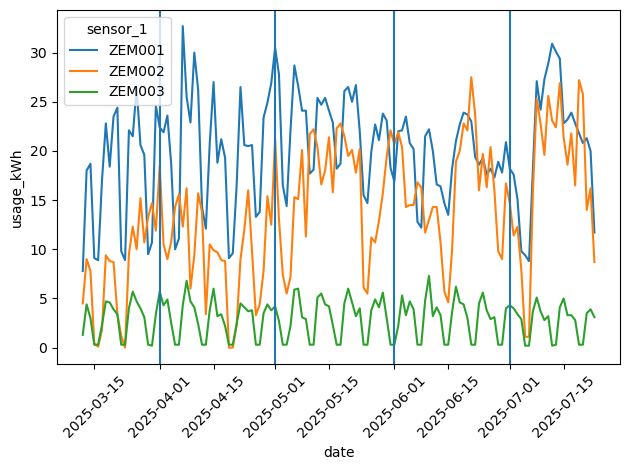

In [262]:
df1 = df[df["sensor_2"].isin(["DB04", "DB05"])]
sns.lineplot(data=df1, x="date", y="usage_kWh", hue="sensor_1")
plt.axvline(datetime.datetime.strptime("2025-04-01", "%Y-%m-%d"))
plt.axvline(datetime.datetime.strptime("2025-05-01", "%Y-%m-%d"))
plt.axvline(datetime.datetime.strptime("2025-06-01", "%Y-%m-%d"))
plt.axvline(datetime.datetime.strptime("2025-07-01", "%Y-%m-%d"))
plt.xticks(rotation=45)
plt.tight_layout()

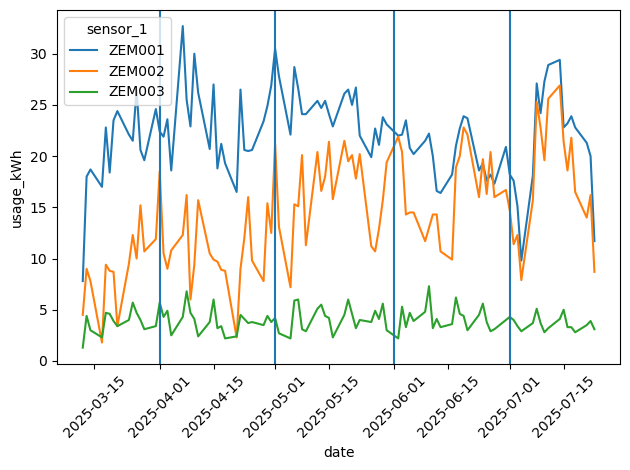

In [294]:
df1 = df[(df["sensor_2"].isin(["DB04", "DB05"])) & (df["day_of_week_str"].isin(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]))]
sns.lineplot(data=df1, x="date", y="usage_kWh", hue="sensor_1")
plt.axvline(datetime.datetime.strptime("2025-04-01", "%Y-%m-%d"))
plt.axvline(datetime.datetime.strptime("2025-05-01", "%Y-%m-%d"))
plt.axvline(datetime.datetime.strptime("2025-06-01", "%Y-%m-%d"))
plt.axvline(datetime.datetime.strptime("2025-07-01", "%Y-%m-%d"))
plt.xticks(rotation=45)
plt.tight_layout()

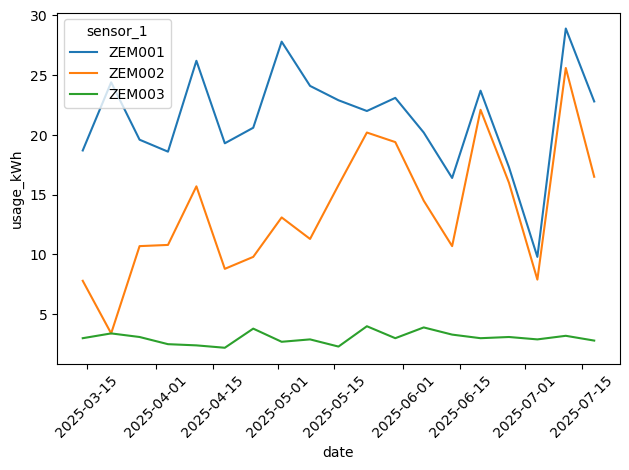

In [300]:
df1 = df[(df["sensor_2"].isin(["DB04", "DB05"])) & (df["day_of_week_str"].isin(["Friday"]))]
sns.lineplot(data=df1, x="date", y="usage_kWh", hue="sensor_1")
plt.xticks(rotation=45)
plt.tight_layout()

<Axes: xlabel='day_of_week_num', ylabel='usage_kWh'>

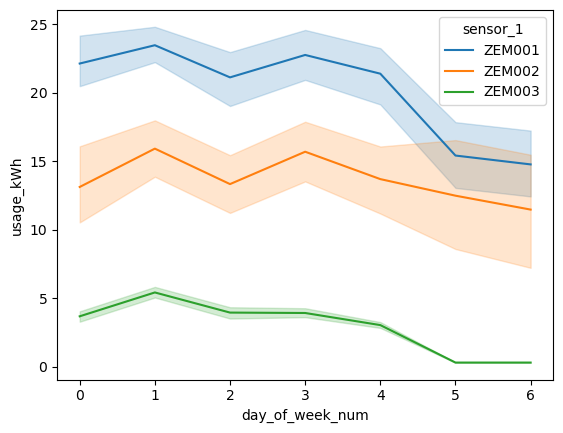

In [264]:
sns.lineplot(data=df1, x="day_of_week_num", y="usage_kWh", hue="sensor_1")
             #hue_order=np.array(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]))
#['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday']

Text(0.5, 1.0, 'ZEM003')

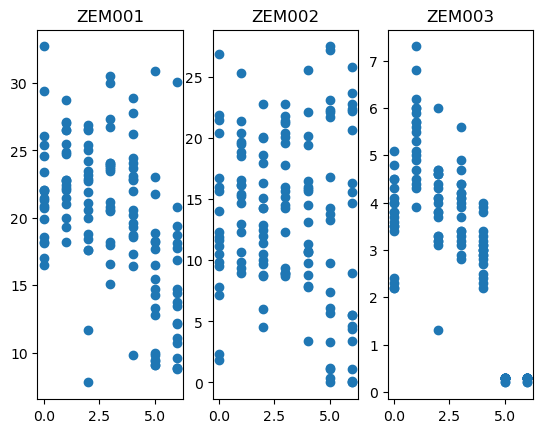

In [293]:
fig, axs = plt.subplots(1, 3)
df1_zem1 = df1[df1["sensor_1"] == "ZEM001"]
df1_zem2 = df1[df1["sensor_1"] == "ZEM002"]
df1_zem3 = df1[df1["sensor_1"] == "ZEM003"]

axs[0].scatter(x=df1_zem1["day_of_week_num"], y=df1_zem1["usage_kWh"], label="ZEM001")
axs[0].set_title("ZEM001")
axs[1].scatter(x=df1_zem2["day_of_week_num"], y=df1_zem2["usage_kWh"])
axs[1].set_title("ZEM002")
axs[2].scatter(x=df1_zem3["day_of_week_num"], y=df1_zem3["usage_kWh"])
axs[2].set_title("ZEM003")